
*check if there are highly correlated features and drop them if there are any.
One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. (  Hint: check Dropfirst option).
for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100

In [14]:

df_1 = pd.read_csv(r"C:\Users\User\Documents\GitHub\Iron-Moran-\Data_Marketing_Customer_Analysis_Round3.csv")
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [15]:
df_1

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


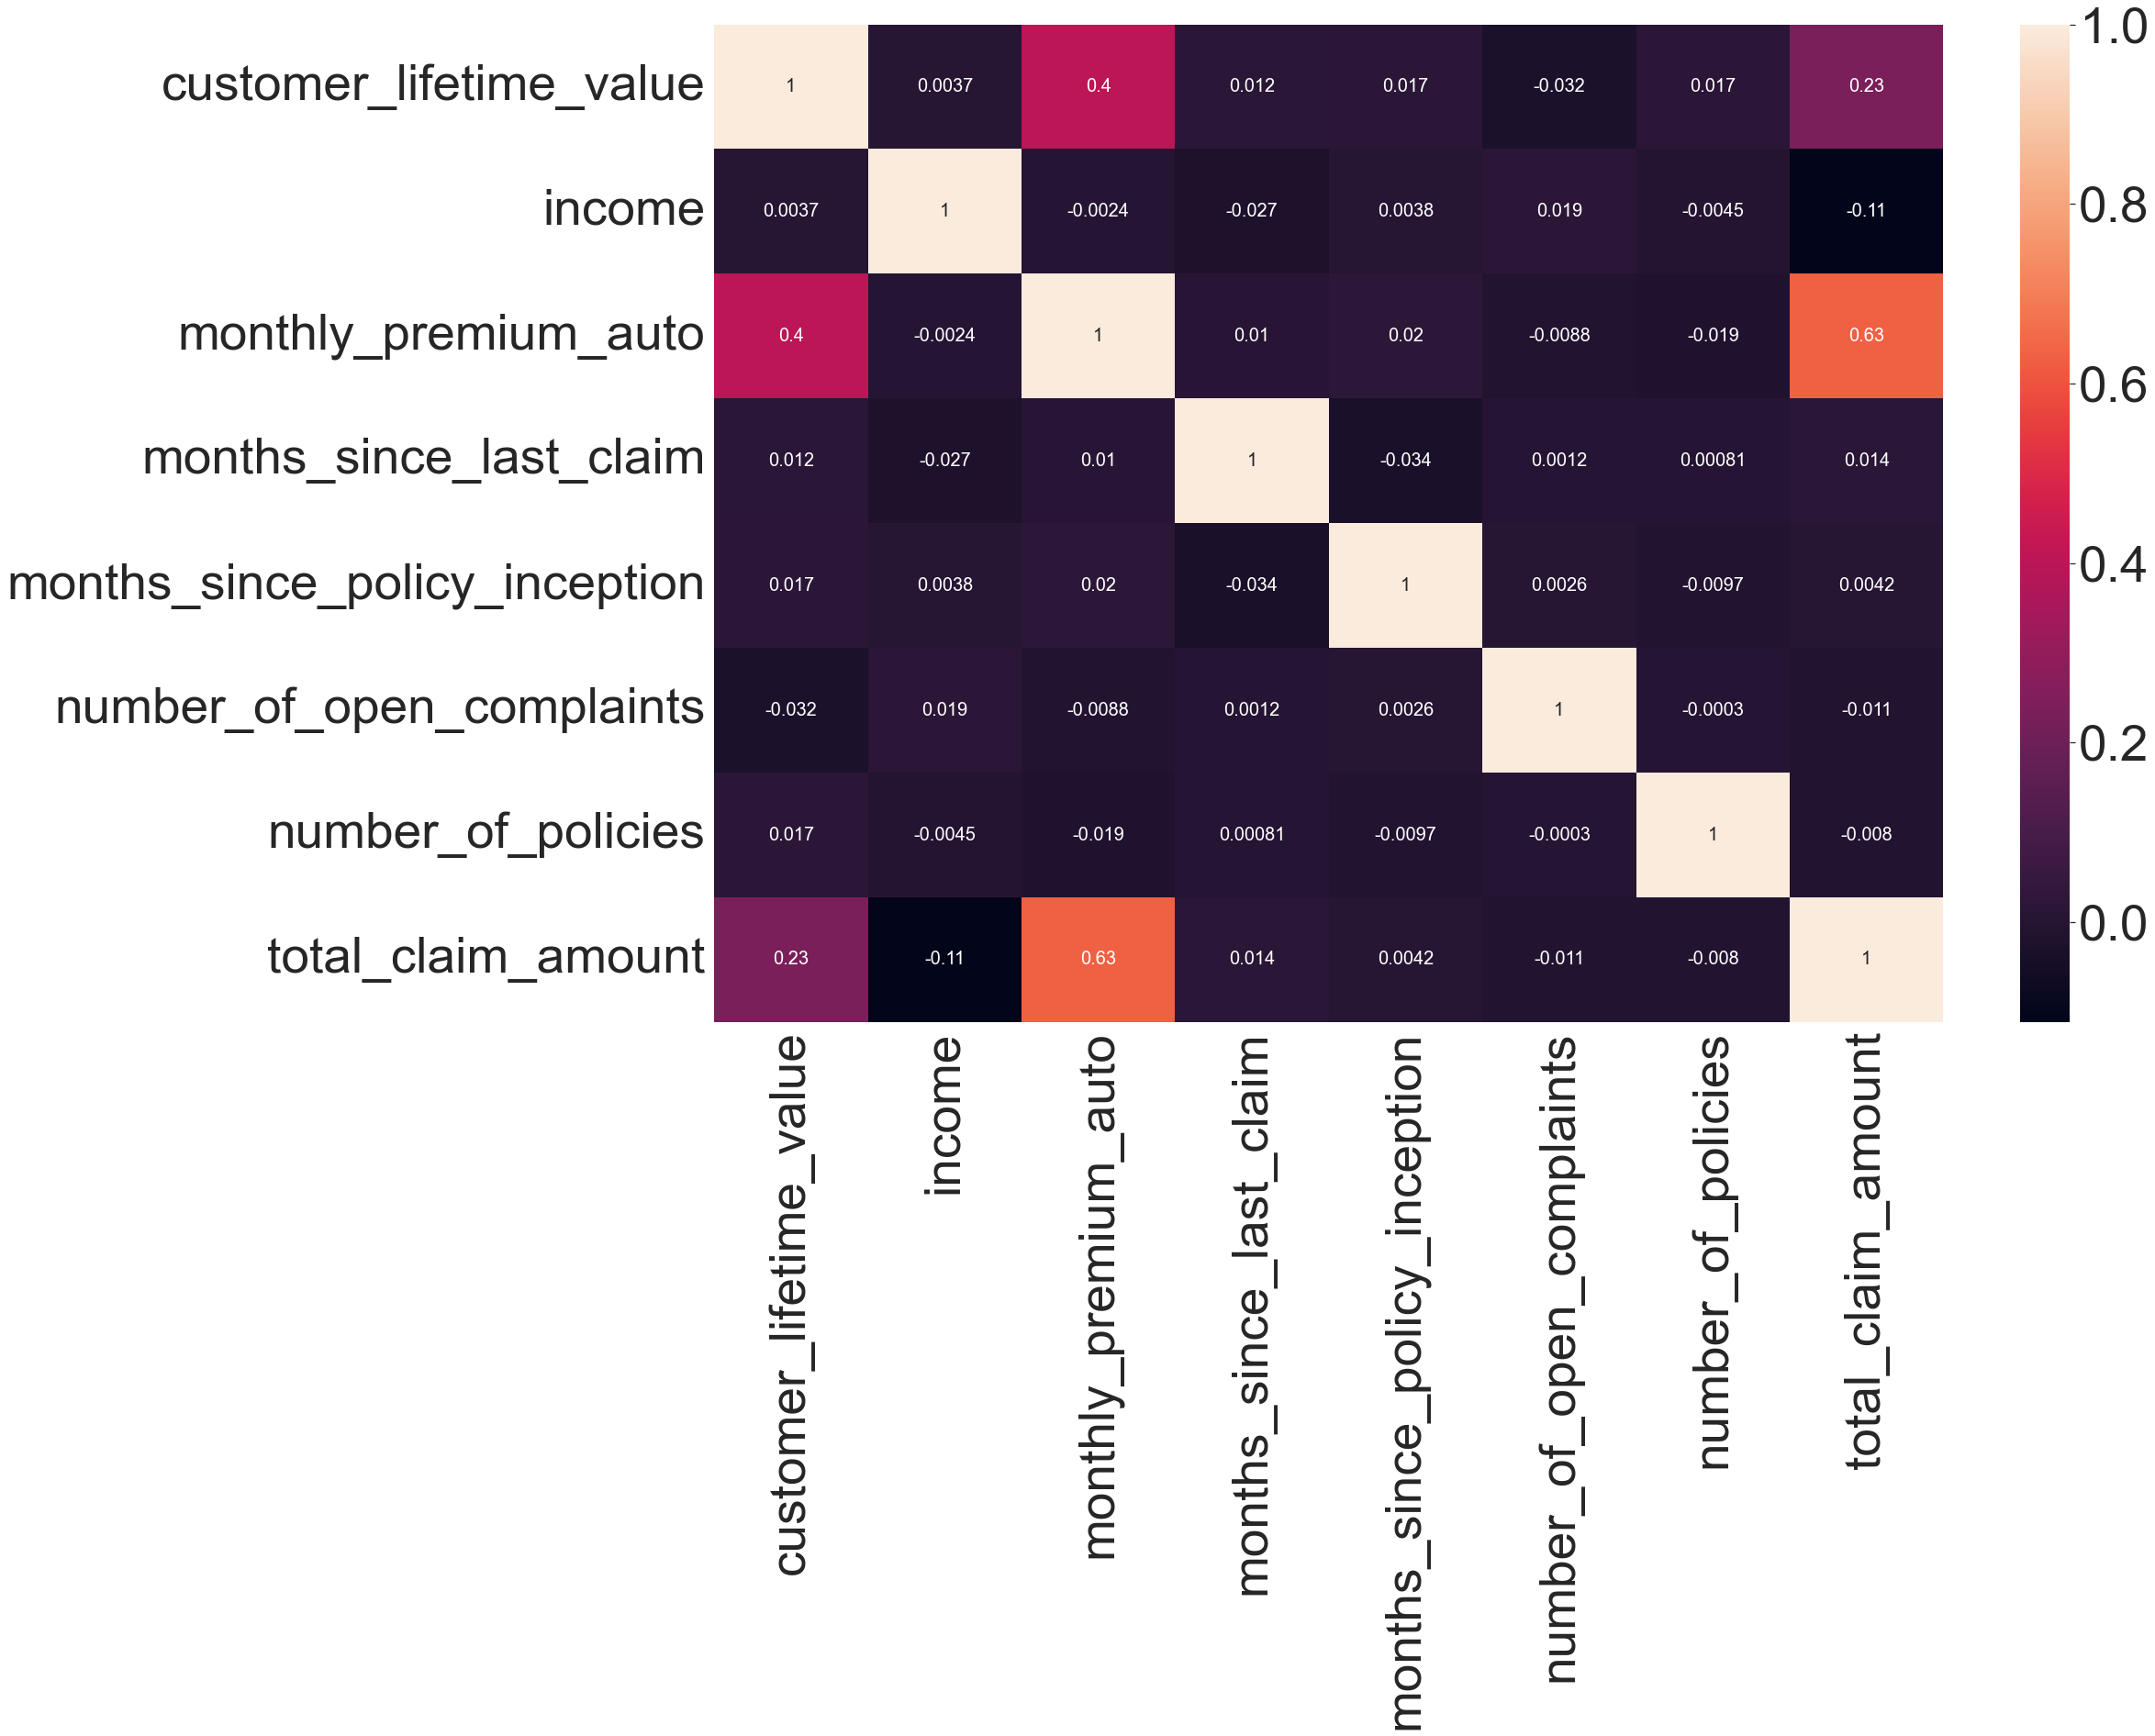

In [16]:
fig1=plt.figure(figsize=(30,20))
sns.heatmap(df_1.corr(),annot_kws={"size":20},annot=True)
sns.set(font_scale=5)

In [17]:
df_cat= df_1.select_dtypes(include='object')
df_numerical = df_1.select_dtypes(include='int64')

# Labeling the column

In [18]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for columns in df_cat:
    df_cat[columns]=label_encoder.fit_transform(df_cat[columns])

df=pd.concat([df_cat,df_numerical],axis=1) 
df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,0,0,1,40,0,1,1,1,1,...,0,1,4809,48029,61,7,52,0,9,292
1,3,0,0,1,9,1,4,0,1,2,...,0,1,2228,92260,64,3,26,0,1,744
2,1,0,0,0,32,0,1,1,1,2,...,4,1,14947,22139,100,34,31,0,2,480
3,2,1,1,1,2,1,1,1,1,2,...,0,1,22332,49078,97,10,3,0,2,484
4,2,0,2,0,8,1,2,0,1,1,...,0,1,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,2,0,10,1,4,0,1,1,...,1,1,15563,61541,253,12,40,0,7,1214
10685,2,0,0,1,27,1,1,0,2,1,...,0,1,5259,61146,65,7,68,0,6,273
10686,0,0,1,0,55,0,1,0,0,1,...,2,1,23893,39837,201,11,63,0,2,381
10687,3,0,2,1,35,0,1,0,2,0,...,4,1,11971,64195,158,0,27,4,6,618


from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['region']= label_encoder.fit_transform(df['region'])
df['response']= label_encoder.fit_transform(df['response'])
df['coverage']= label_encoder.fit_transform(df['coverage'])
df['education']= label_encoder.fit_transform(df['education'])
df['month']= label_encoder.fit_transform(df['month'])
df['employment_status']= label_encoder.fit_transform(df['employment_status'])
df['gender']= label_encoder.fit_transform(df['gender'])
df['marital_status']= label_encoder.fit_transform(df['marital_status'])
df['policy_type']= label_encoder.fit_transform(df['policy_type'])
df['policy']= label_encoder.fit_transform(df['policy'])
df['renew_offer_type']= label_encoder.fit_transform(df['renew_offer_type'])
df['sales_channel']= label_encoder.fit_transform(df['sales_channel'])
df['vehicle_class']= label_encoder.fit_transform(df['vehicle_class'])
df['effective_to_date']= label_encoder.fit_transform(df['effective_to_date'])
df['location_code']= label_encoder.fit_transform(df['location_code'])



  
df


Begin by visually examining distributions (histagrams) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has noticably large skew (slanted with respect to the mean). For example, you might select customer_lifetime_value as a candidate varB which has skew.

    varA

    Use minmax transform to bring varA's values into the range [0,1].
    Check that varA has been rescaled using a distplot or a histagram


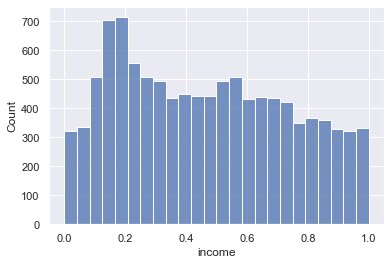

In [62]:
varA=df['income']
varB=df['customer_lifetime_value']

normalized_varA=(varA-varA.min())/(varA.max()-varA.min())
normalized_varA
sns.histplot(data=normalized_varA)
sns.set(font_scale=1)


    varB

    Use StandardScalar or PowerTransform to reduce the skew and standardize varB's distribution.
    Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.


In [20]:
varB

0         4809
1         2228
2        14947
3        22332
4         9025
         ...  
10684    15563
10685     5259
10686    23893
10687    11971
10688     6857
Name: customer_lifetime_value, Length: 10689, dtype: int64

In [21]:
varB= np.array(varB.reset_index(drop=True))

In [22]:
varB

array([ 4809,  2228, 14947, ..., 23893, 11971,  6857], dtype=int64)

In [23]:

varB=varB.reshape(-1,1)


In [24]:
# box-cox

import numpy as np
from sklearn.preprocessing import power_transform
data = varB
a=power_transform(data, method='box-cox')

<AxesSubplot:ylabel='Count'>

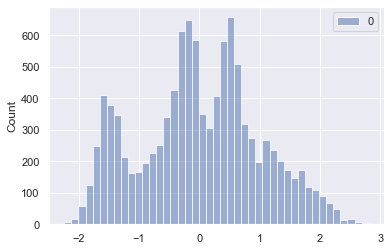

In [63]:
sns.histplot(data=a)


In [27]:
# yeo-johnson

import numpy as np
from sklearn.preprocessing import power_transform
data1 = varB
b=power_transform(data1, method='yeo-johnson')

<AxesSubplot:ylabel='Count'>

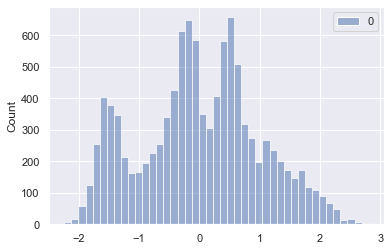

In [64]:
sns.histplot(data=b)


# X-y split (y is the target variable, which is the total claim amount)


In [28]:
x=df_numerical.drop('total_claim_amount', axis=1)
y=df_numerical.total_claim_amount
x

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

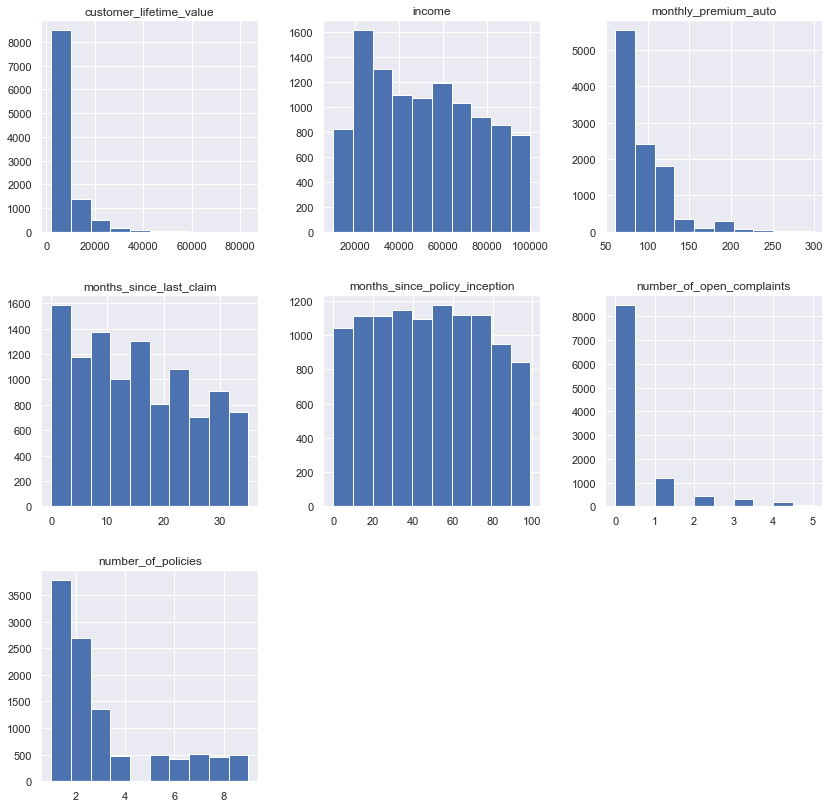

In [65]:
x.hist(figsize=(14,14))

# Train-test split.

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30,random_state=123)


# Standardize the data 

In [31]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler().fit(x_train)   ##. finding the parameters ( mean, variance from the training set )

x_train_scaled=std_scaler.transform(x_train)


In [32]:
x_test_scaled=std_scaler.transform(x_test)

In [33]:
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions_train = model.predict(x_train_const_scaled) 

x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
predictions_test = model.predict(x_test_const_scaled) 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     742.9
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:11:47   Log-Likelihood:                -51168.
No. Observations:                7482   AIC:                         1.024e+05
Df Residuals:                    7474   BIC:                         1.024e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      2.612    165.770      0.0

# Two variables


In [34]:
x1=np.array(df_1['monthly_premium_auto'])
y1=np.array(df_1['total_claim_amount'])

x1 = x1.reshape(-1,1)
y1 = y1.reshape(-1,1)

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x1, y1, test_size=.30,random_state=123)

In [36]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler().fit(x_train)   ##. finding the parameters ( mean, variance from the training set )

x_train_scaled=std_scaler.transform(x_train)

x_test_scaled=std_scaler.transform(x_test)


In [37]:
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions_train = model.predict(x_train_const_scaled) 

x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
predictions_test = model.predict(x_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     4924.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:11:50   Log-Likelihood:                -51252.
No. Observations:                7482   AIC:                         1.025e+05
Df Residuals:                    7480   BIC:                         1.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      2.641    163.987      0.0

# Adding the categorical columns


array([[<AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'response'}>,
        <AxesSubplot:title={'center':'coverage'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'employment_status'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'location_code'}>,
        <AxesSubplot:title={'center':'marital_status'}>,
        <AxesSubplot:title={'center':'policy_type'}>],
       [<AxesSubplot:title={'center':'policy'}>,
        <AxesSubplot:title={'center':'renew_offer_type'}>,
        <AxesSubplot:title={'center':'sales_channel'}>,
        <AxesSubplot:title={'center':'vehicle_class'}>,
        <AxesSubplot:title={'center':'vehicle_size'}>],
       [<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubp

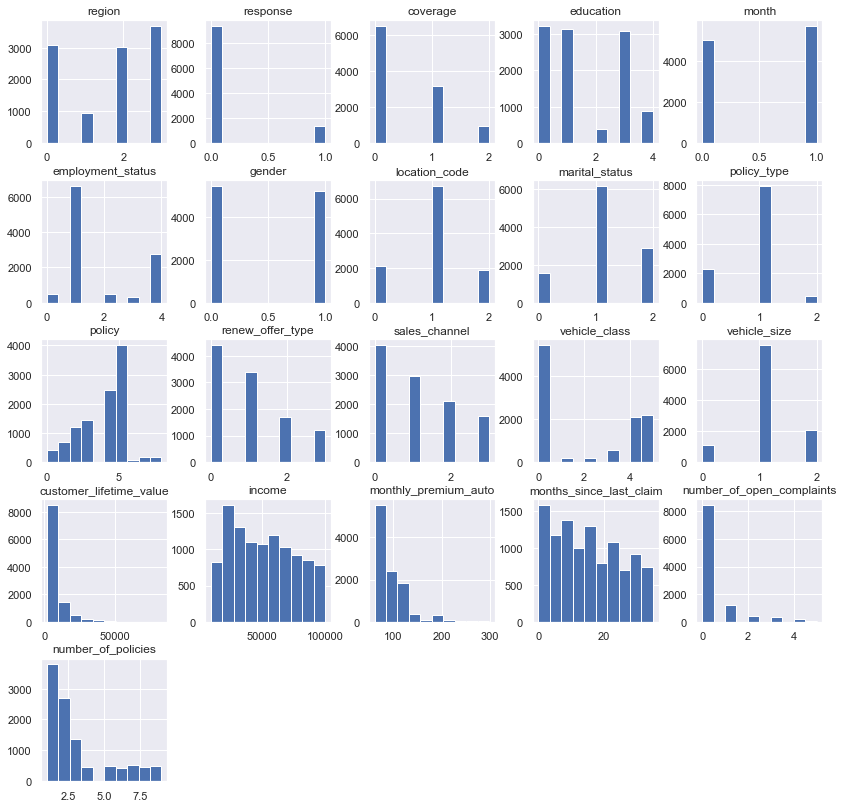

In [66]:
x2=df.drop(['total_claim_amount', 'effective_to_date','months_since_policy_inception'],axis=1)
y2=df.total_claim_amount

x2.hist(figsize=(14,14))



In [39]:
x_train, x_test, y_train, y_test=train_test_split(x2, y2, test_size=.30,random_state=123)


In [40]:
std_scaler=StandardScaler().fit(x_train)   ##. finding the parameters ( mean, variance from the training set )

x_train_scaled=std_scaler.transform(x_train)

x_test_scaled=std_scaler.transform(x_test)


In [41]:
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions_train = model.predict(x_train_const_scaled) 

x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
predictions_test = model.predict(x_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     539.7
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:12:00   Log-Likelihood:                -49687.
No. Observations:                7482   AIC:                         9.942e+04
Df Residuals:                    7460   BIC:                         9.957e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      2.145    201.854      0.0

In [42]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()    # model
model.fit(x_train_scaled, y_train)   # model train
x_train

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,...,renew_offer_type,sales_channel,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies
6608,2,0,0,1,1,0,1,1,2,1,...,2,0,5,1,7271,20545,70,23,0,2
5697,2,0,0,0,1,4,0,1,1,1,...,1,0,5,2,5079,70474,68,6,0,5
10524,2,1,0,3,1,1,0,2,1,1,...,0,0,4,1,4428,58577,110,6,0,1
397,3,1,1,1,1,1,1,1,2,0,...,1,1,5,2,22332,49078,97,10,0,2
6324,0,0,0,1,0,4,1,1,2,1,...,1,2,0,1,2430,26182,70,29,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,3,0,1,1,1,1,0,0,1,1,...,3,2,5,1,3086,73938,76,34,0,1
7763,2,0,0,3,1,1,1,1,1,1,...,1,2,5,2,5658,78834,72,14,2,8
5218,0,0,0,0,0,1,0,1,1,1,...,2,3,5,2,2434,23033,62,5,0,1
1346,0,1,0,0,1,1,1,0,1,2,...,2,0,0,1,23594,76358,66,25,0,2


In [43]:
model.coef_

array([-4.69169854e-02,  3.55982838e+00, -2.28365301e+00,  4.42698484e+00,
       -2.12123221e+00,  8.89973986e+01,  1.60019788e+01,  7.09972030e+01,
        3.17107233e+01,  5.76680632e+00, -6.76452978e+00,  1.91141495e+00,
       -1.03598723e-01, -3.79656122e+00,  1.90363126e+01, -2.33479793e+00,
       -3.44196102e+01,  1.86639732e+02,  2.80639383e+00,  2.36477312e+00,
       -4.72945967e+00])

In [44]:
model.intercept_

433.0597433841219


# Modeling using Scikit Learn



In [45]:
y_pred=model.predict(x_test_scaled)   # model prediction

y_pred_train=model.predict(x_train_scaled)

In [46]:
y_pred

array([364.55025503, 307.10775424, 484.82534869, ..., 559.28086368,
       111.66485714, 548.73747739])

In [47]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [48]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

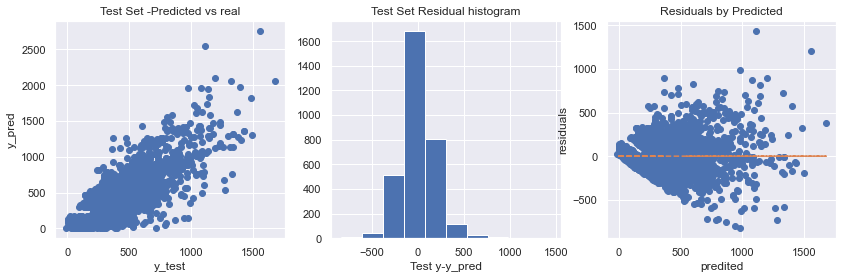

In [67]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

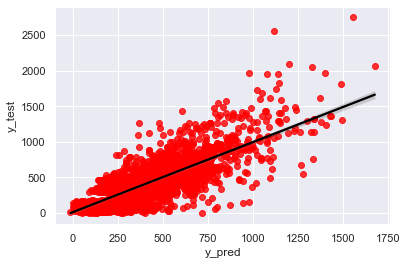

In [68]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [69]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

33902.67903525862


NameError: name 'mae' is not defined

In [52]:
from sklearn.metrics import mean_squared_error as mse
mse(y_train,y_pred_train)

34336.90627815824

In [53]:
rmse=mse(y_train,y_pred_train)**(1/2)
rmse

185.3022025723338

In [54]:
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_pred)
R2

0.5935662757265945

In [55]:
R2_test=model.score(x_test_scaled,y_test)
R2_train=model.score(x_train_scaled,y_train)

In [56]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_R2

0.5908864929291875

In [57]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

features_importances



,Attribute,Importance
17,monthly_premium_auto,186.639732
5,employment_status,88.997399
7,location_code,70.997203
16,income,34.419610
8,marital_status,31.710723
14,vehicle_size,19.036313
6,gender,16.001979
10,policy,6.764530
9,policy_type,5.766806
20,number_of_policies,4.729460


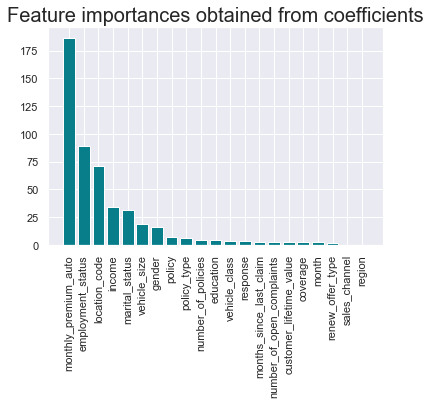

In [70]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Remove outliers


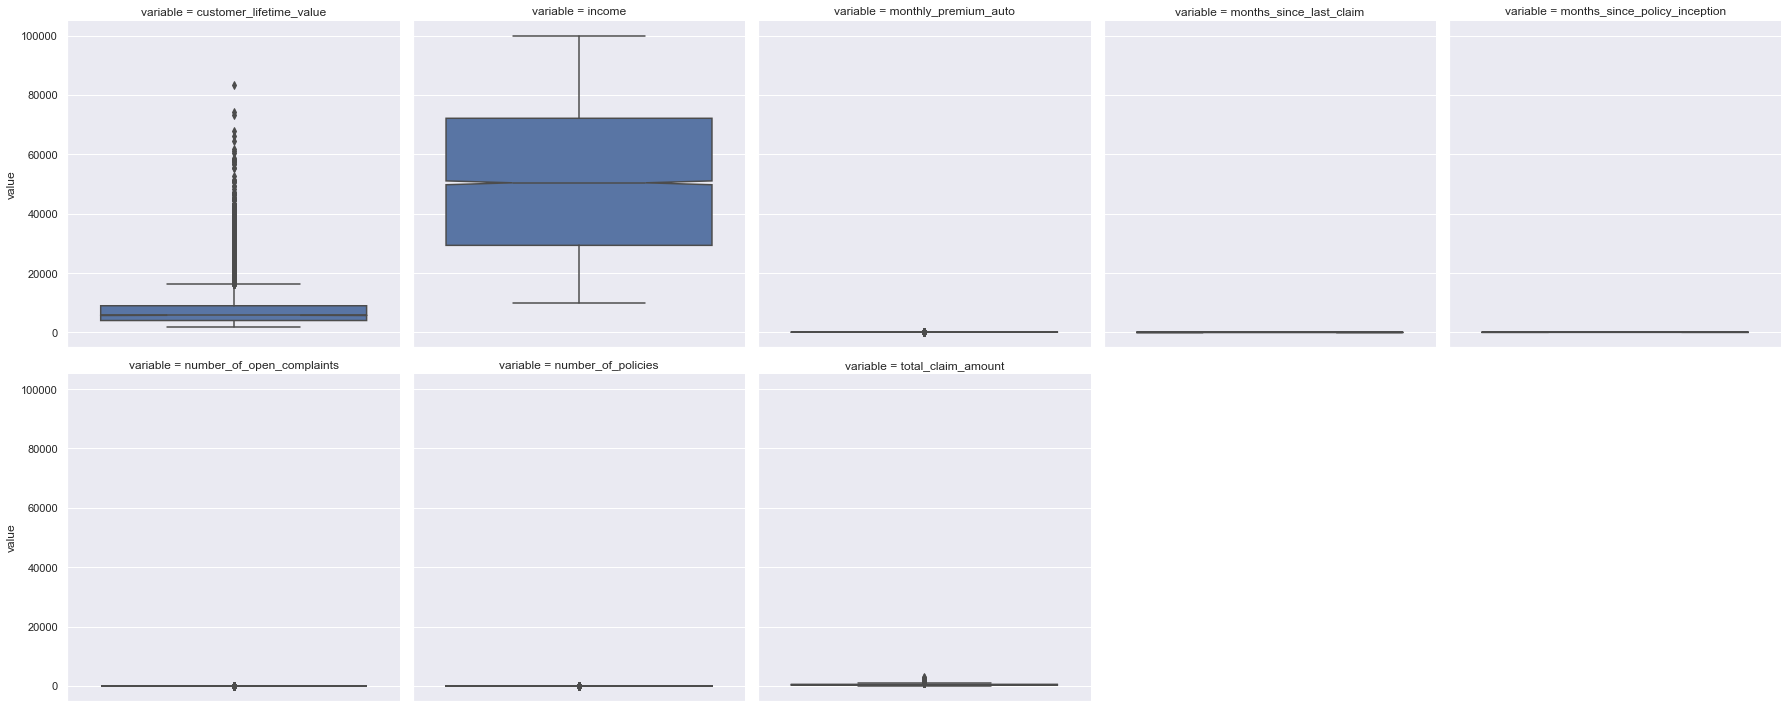

In [86]:
sns.catplot(y='value', col='variable', col_wrap=5,notch= True,
            data=df_numerical.melt(), kind='box')


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_lifetime_value'>

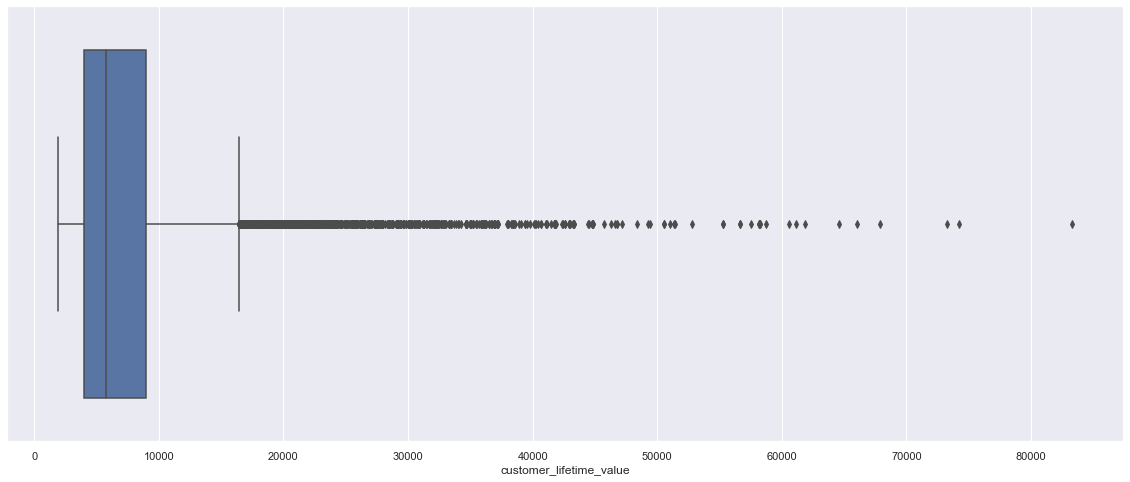

In [88]:
sns.boxplot(df_1['customer_lifetime_value'])

# Remove outliers from all columns

In [106]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.05,0.95]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)

capping the  region
capping the  response
capping the  coverage
capping the  education
capping the  effective_to_date
capping the  month
capping the  employment_status
capping the  gender
capping the  location_code
capping the  marital_status
capping the  policy_type
capping the  policy
capping the  renew_offer_type
capping the  sales_channel
capping the  vehicle_class
capping the  vehicle_size
capping the  customer_lifetime_value
capping the  income
capping the  monthly_premium_auto
capping the  months_since_last_claim
capping the  months_since_policy_inception
capping the  number_of_open_complaints


C:\Users\User\AppData\Local\Temp\ipykernel_13808\3685441214.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\User\AppData\Local\Temp\ipykernel_13808\3685441214.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]


capping the  number_of_policies
capping the  total_claim_amount


In [107]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   region                         10689 non-null  int32
 1   response                       10689 non-null  int32
 2   coverage                       10689 non-null  int32
 3   education                      10689 non-null  int32
 4   effective_to_date              10689 non-null  int32
 5   month                          10689 non-null  int32
 6   employment_status              10689 non-null  int32
 7   gender                         10689 non-null  int32
 8   location_code                  10689 non-null  int32
 9   marital_status                 10689 non-null  int32
 10  policy_type                    10689 non-null  int32
 11  policy                         10689 non-null  int32
 12  renew_offer_type               10689 non-null  int32
 13  sales_channel   

array([[<AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'response'}>,
        <AxesSubplot:title={'center':'coverage'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'employment_status'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'location_code'}>,
        <AxesSubplot:title={'center':'marital_status'}>,
        <AxesSubplot:title={'center':'policy_type'}>],
       [<AxesSubplot:title={'center':'policy'}>,
        <AxesSubplot:title={'center':'renew_offer_type'}>,
        <AxesSubplot:title={'center':'sales_channel'}>,
        <AxesSubplot:title={'center':'vehicle_class'}>,
        <AxesSubplot:title={'center':'vehicle_size'}>],
       [<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubp

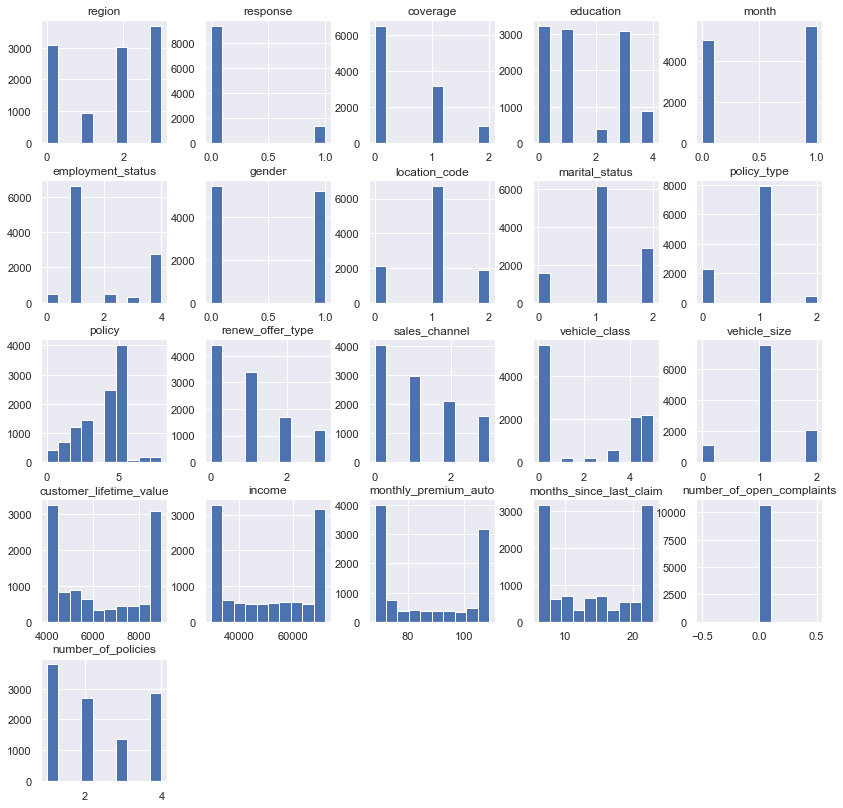

In [108]:
x3=final_df.drop(['total_claim_amount', 'effective_to_date','months_since_policy_inception'],axis=1)
y3=final_df.total_claim_amount

x3.hist(figsize=(14,14))

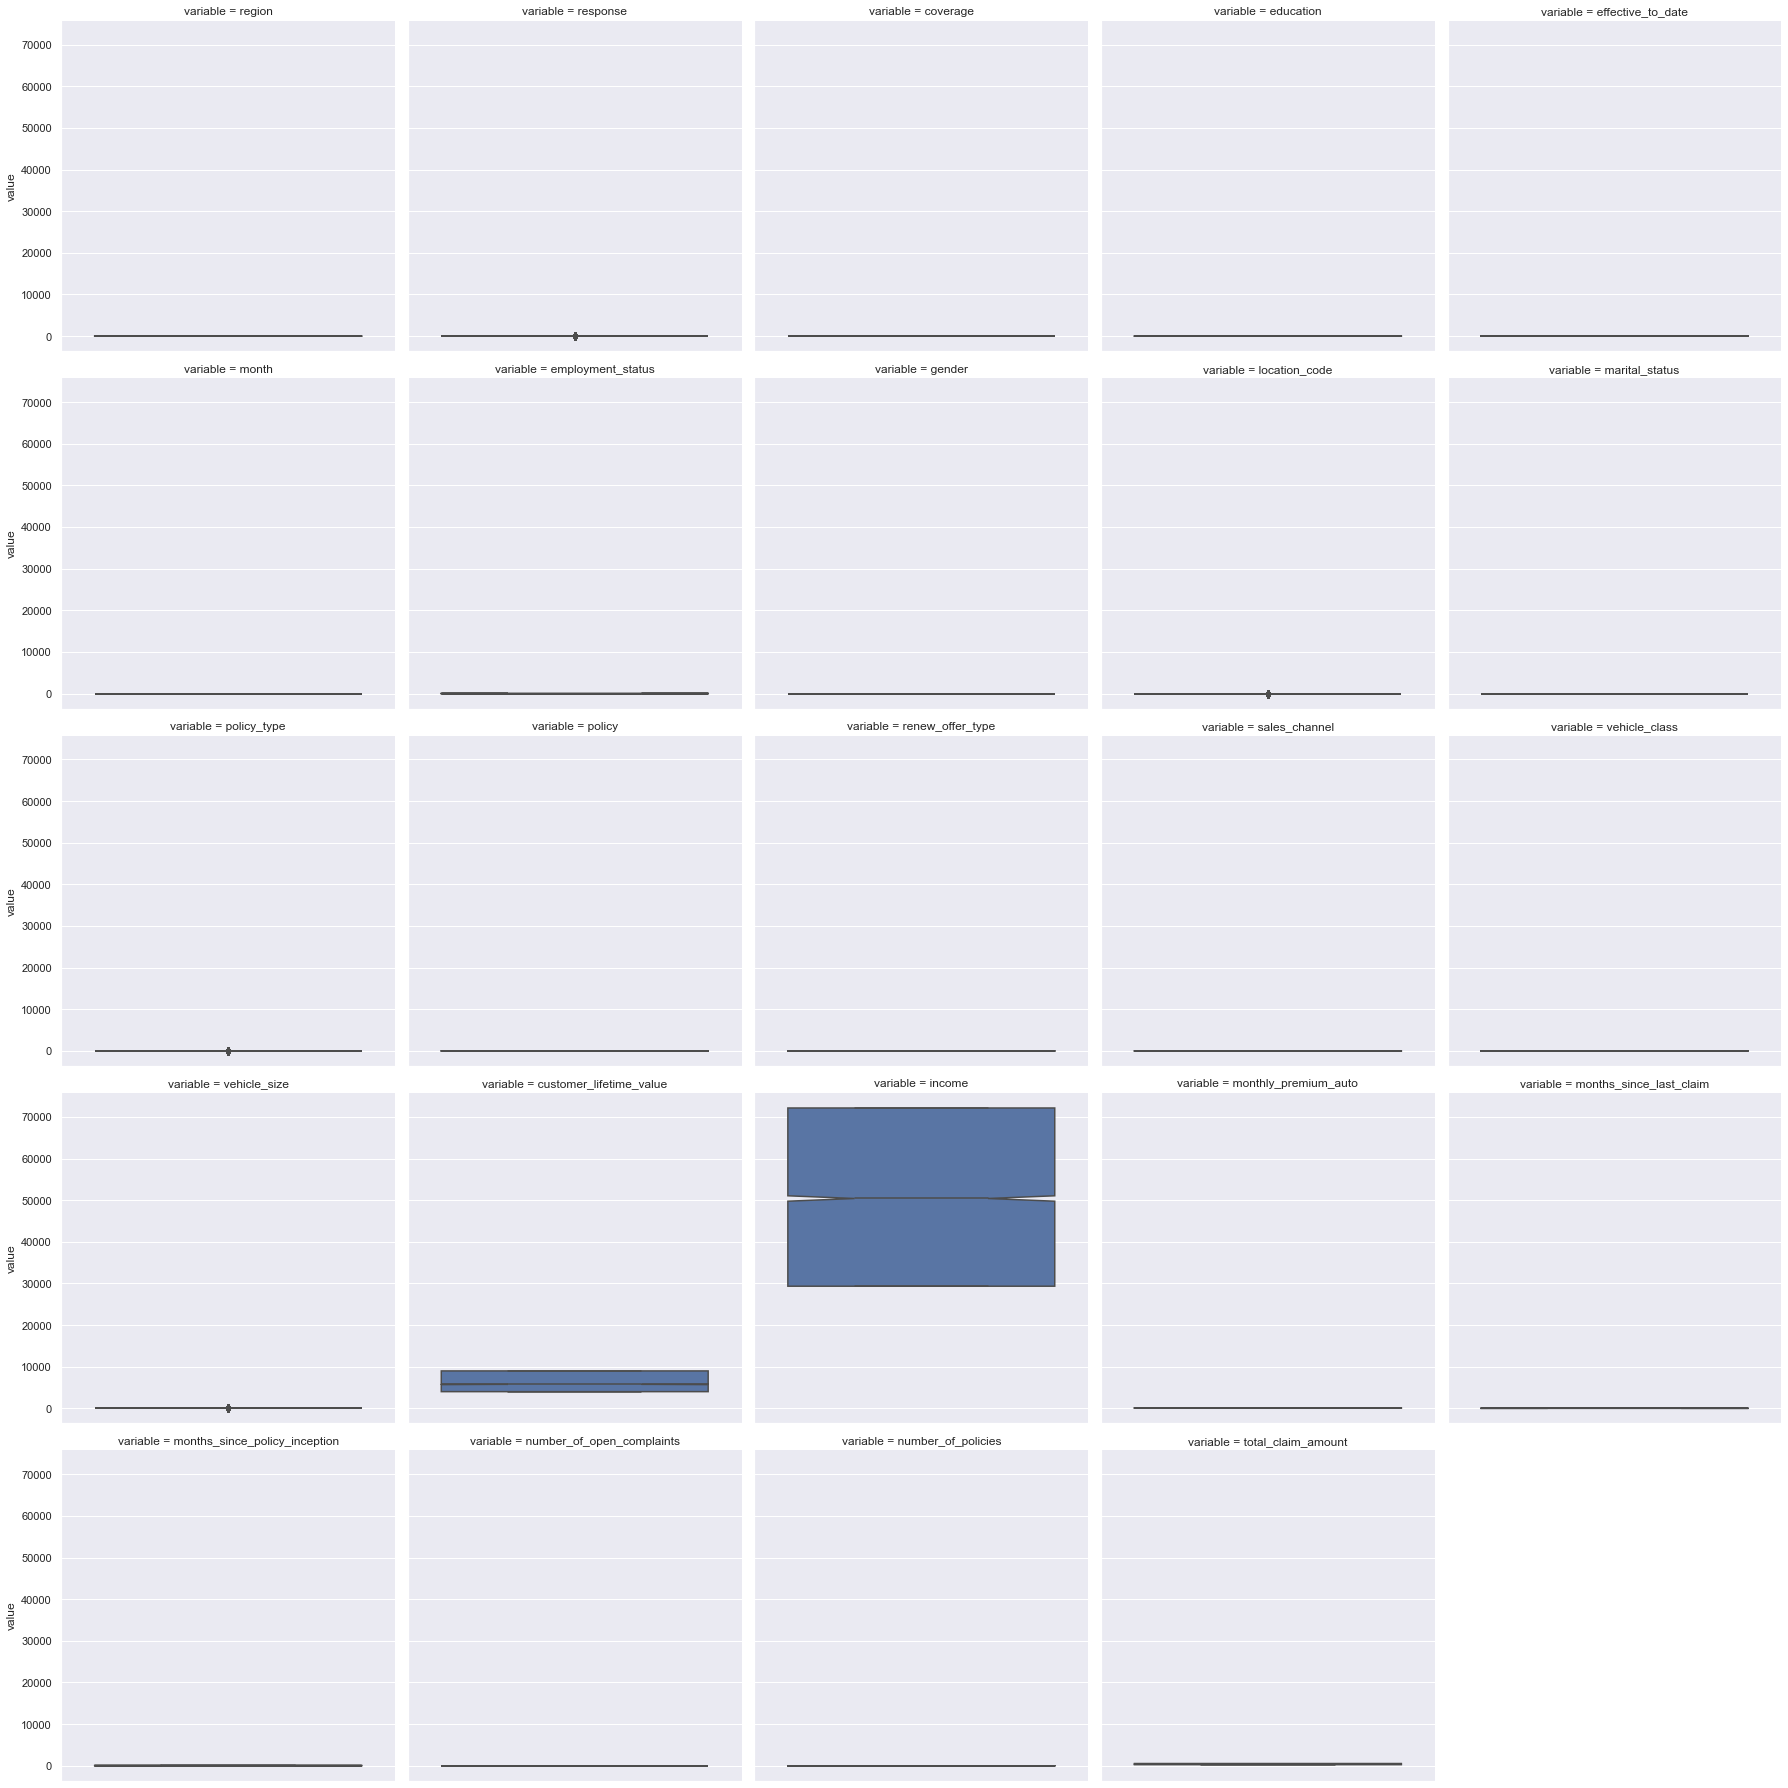

In [109]:
sns.catplot(y='value', col='variable', col_wrap=5,notch= True,
            data=final_df.melt(), kind='box')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_lifetime_value'>

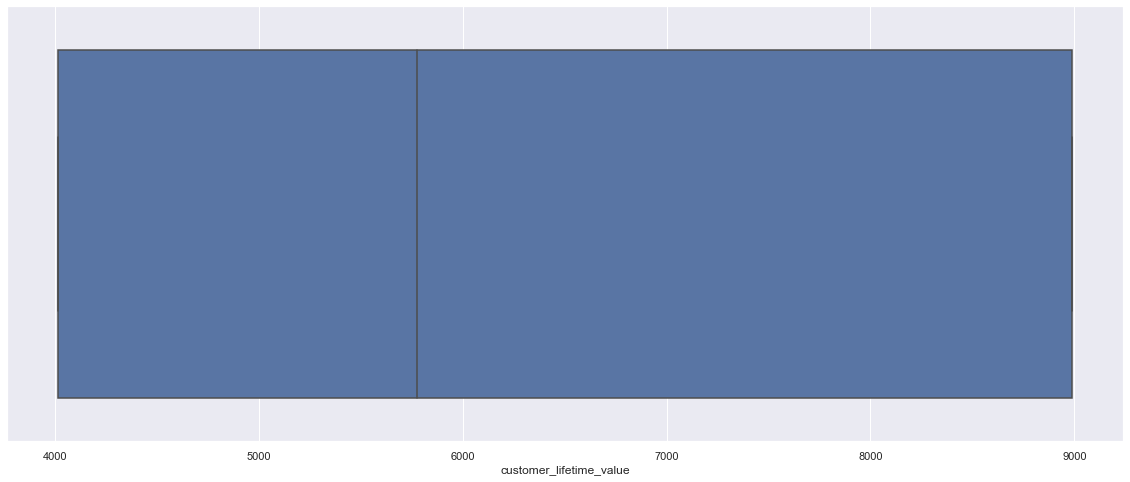

In [110]:
sns.boxplot(final_df['customer_lifetime_value'])

# Modeling without outliers


In [111]:
x3=df_numerical.drop('total_claim_amount', axis=1)
y3=df_numerical.total_claim_amount

In [112]:
x_train, x_test, y_train, y_test=train_test_split(x3, y3, test_size=.30,random_state=123)

In [113]:
std_scaler=StandardScaler().fit(x_train)   ##. finding the parameters ( mean, variance from the training set )

x_train_scaled=std_scaler.transform(x_train)

x_test_scaled=std_scaler.transform(x_test)

x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions_train = model.predict(x_train_const_scaled) 

x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
predictions_test = model.predict(x_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     742.9
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:01:02   Log-Likelihood:                -51168.
No. Observations:                7482   AIC:                         1.024e+05
Df Residuals:                    7474   BIC:                         1.024e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      2.612    165.770      0.0